In [2]:
! pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 KB 455.3 kB/s eta 0:00:00a 0:00:01


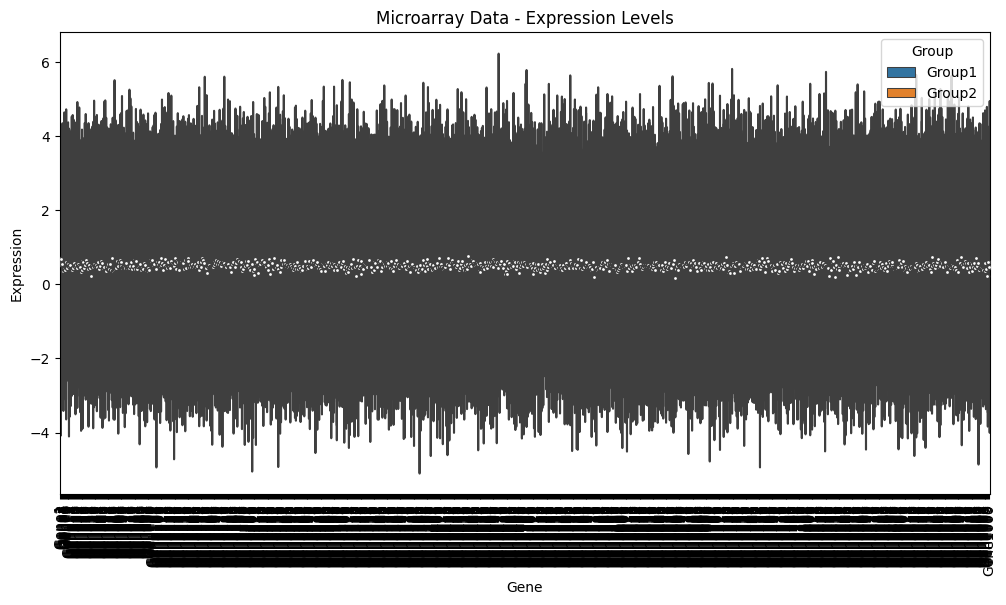

Top 10 Differentially Expressed Genes:
Gene: Gene138
T-Statistic: -10.49625610111441
P-Value: 8.953967388619662e-21
---
Gene: Gene229
T-Statistic: -10.27617234744451
P-Value: 3.9848867306440743e-20
---
Gene: Gene511
T-Statistic: -10.153300008013941
P-Value: 9.135070991001299e-20
---
Gene: Gene340
T-Statistic: -10.067967232174574
P-Value: 1.622461804954893e-19
---
Gene: Gene95
T-Statistic: -9.953887989750509
P-Value: 3.488735403033925e-19
---
Gene: Gene768
T-Statistic: -9.90574469226933
P-Value: 4.815374944239703e-19
---
Gene: Gene473
T-Statistic: -9.863764630966779
P-Value: 6.3752633076388095e-19
---
Gene: Gene898
T-Statistic: -9.85457827830962
P-Value: 6.778661318469148e-19
---
Gene: Gene902
T-Statistic: -9.801817448670064
P-Value: 9.63885520566901e-19
---
Gene: Gene518
T-Statistic: -9.66027238688343
P-Value: 2.470756655413068e-18
---


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Creating a sample microarray dataset with more data points
np.random.seed(1)
n_samples = 100
n_genes = 1000

group1 = np.random.normal(loc=0, scale=1, size=(n_samples, n_genes))
group2 = np.random.normal(loc=1, scale=1, size=(n_samples, n_genes))

gene_ids = ['Gene{}'.format(i) for i in range(1, n_genes + 1)]

data = pd.DataFrame(np.concatenate((group1, group2), axis=0), columns=gene_ids)
data['Group'] = ['Group1'] * n_samples + ['Group2'] * n_samples

# Visualizing the microarray data using violin plots
data_melted = pd.melt(data, id_vars='Group', var_name='Gene', value_name='Expression')

plt.figure(figsize=(12, 6))
sns.violinplot(data=data_melted, x='Gene', y='Expression', hue='Group', split=True)
plt.xlabel('Gene')
plt.ylabel('Expression')
plt.title('Microarray Data - Expression Levels')
plt.xticks(rotation=90)
plt.show()

# Performing differential expression analysis for each gene
differential_results = []

for gene_id in gene_ids:
    group1_expr = data[data['Group'] == 'Group1'][gene_id]
    group2_expr = data[data['Group'] == 'Group2'][gene_id]

    t_stat, p_value = stats.ttest_ind(group1_expr, group2_expr)
    differential_results.append((gene_id, t_stat, p_value))

# Sorting genes based on p-values
differential_results.sort(key=lambda x: x[2])

# Printing top 10 differentially expressed genes
print('Top 10 Differentially Expressed Genes:')
for i in range(10):
    gene_id, t_stat, p_value = differential_results[i]
    print('Gene:', gene_id)
    print('T-Statistic:', t_stat)
    print('P-Value:', p_value)
    print('---')
